In [1]:
import pandas as pd
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
test.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


In [4]:
train.isnull().any()

Artist      False
Song         True
Genre       False
Language     True
Lyrics       True
dtype: bool

In [5]:
train.isnull().sum()

Artist       0
Song         1
Genre        0
Language     4
Lyrics      35
dtype: int64

In [6]:
train = train.dropna()

Handle the missing data. Mostly I think Right now I will handle it via deletion of the fields which are missing.


In [7]:
train.describe()

,Artist,Song,Genre,Language,Lyrics
count,290143,290143,290143,290143,290143
unique,11152,164325,10,33,249292
top,elvis presley,intro,Rock,en,Instrumental
freq,1611,163,121390,250196,540


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290143 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    290143 non-null  object
 1   Song      290143 non-null  object
 2   Genre     290143 non-null  object
 3   Language  290143 non-null  object
 4   Lyrics    290143 non-null  object
dtypes: object(5)
memory usage: 13.3+ MB


In [9]:
train

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [10]:
train['Language'].unique()

array(['en', 'ro', 'pt', 'ca', 'es', 'cy', 'so', 'it', 'tl', 'sv', 'fr',
       'af', 'sw', 'nl', 'sq', 'vi', 'no', 'da', 'de', 'id', 'hr', 'fi',
       'pl', 'et', 'sl', 'sk', 'hu', 'tr', 'lt', 'cs', 'ko', 'ru', 'lv'],
      dtype=object)

In [11]:
train['Artist'].unique()

array(['12 stones', '3 doors down', '311', ..., 'failure', 'ahmet kaya',
       'crawdad republic'], dtype=object)

In [12]:
train['Song'].unique()

array(['world so cold', 'broken', '3 leaf loser', ...,
       'i totally miss you', 'cure for aids', 'iceberg meadows'],
      dtype=object)

In [13]:
train['Genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [14]:
train['Lyrics'].unique()

array(["It starts with pain, followed by hate\nFueled by the endless questions no one can answer\nA stain covers your heart and tears you apart\nJust like a sleeping cancer\nI don't believe men are born to be killers\nI don't believe the world can be saved\nHow did you get here and when did it start?\nAn innocent child with a thorn in his heart\nWhat kind of world do we live in?\nWhere love is divided by hate\nLoosing control of our feelings\nWe all must be dreaming this life away\nIn a world so cold\nAre you sane, where's the shame?\nA moment of time passes by you cannot rewind\nWho's to blame and where did it start?\nIs there a cure for your sickness\nHave you no heart?\nI don't believe men are born to be killers\nI don't believe the world can't be saved\nHow did you get here and when did it start?\nAn innocent child with a thorn in his heart\nWhat kind of world do we live in?\nWhere love is divided by hate\nSelling our soul for no reason\nWe all must be dreaming this life away\nIn a

We have to predict genre. Target class is genre. Now, firstly, we will predict genre based on lyrics column. Then, we will predict based on lyrics and artist. 

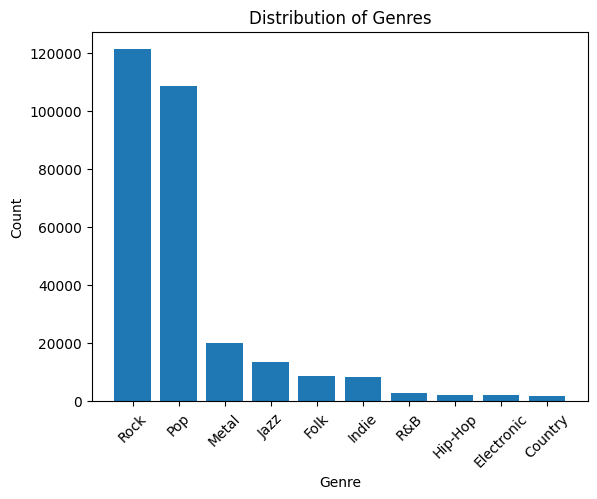

In [15]:
import matplotlib.pyplot as plt
genre_counts = train['Genre'].value_counts()

plt.bar(genre_counts.index,genre_counts.values)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')

plt.xticks(rotation=45)

plt.show()

In [16]:
#import regex as re
#def rid_of_specials(words):
#    new= ''
#    for i in range(len(words)):
#        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
#        new += a
#    return new

In [17]:
#train['Lyrics'] = train["Lyrics"].apply(rid_of_specials)
#train["Lyrics"].head(10)

In [18]:
import regex as re

def rid_of_specials(words):
    return re.sub('[^A-Za-z\s]+', '', words).lower()

train['Lyrics'] = train['Lyrics'].apply(rid_of_specials)
train['Lyrics'].head()

0    it starts with pain followed by hate\nfueled b...
1    freedom\nalone again again alone\npatiently wa...
2    biting the hand that feeds you lying to the vo...
3    you say you know just who i am\nbut you cant i...
4    my heart is beating faster cant control these ...
Name: Lyrics, dtype: object

In [19]:
train.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,it starts with pain followed by hate\nfueled b...
1,12 stones,broken,Rock,en,freedom\nalone again again alone\npatiently wa...
2,12 stones,3 leaf loser,Rock,en,biting the hand that feeds you lying to the vo...
3,12 stones,anthem for the underdog,Rock,en,you say you know just who i am\nbut you cant i...
4,12 stones,adrenaline,Rock,en,my heart is beating faster cant control these ...


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/adwait-
[nltk_data]     sawant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adwait-
[nltk_data]     sawant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/adwait-
[nltk_data]     sawant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
sw_nltk = (stopwords.words('english'))
stop_words = set(sw_nltk)

In [22]:
def remove_sw(x):
    x = x.split(' ')
    return  ' '.join(z for z in x if z not in stop_words)
stopped = train["Lyrics"].apply(remove_sw)
stopped

0         starts pain followed hate\nfueled endless ques...
1         freedom\nalone alone\npatiently waiting phone\...
2         biting hand feeds lying voice\ninside reach be...
3         say know am\nbut cant imagine\nwhat waits acro...
4         heart beating faster cant control feelings\nan...
                                ...                        
290178    im best friend hes got id give shirt back know...
290179    bad boys blue totally miss wrong foolish heart...
290180    forgive things never said forgive knowing righ...
290181    day found cure aids day found cure aids everyb...
290182    fourth july come custom go make way  place cal...
Name: Lyrics, Length: 290143, dtype: object

In [23]:
train.describe()

,Artist,Song,Genre,Language,Lyrics
count,290143,290143,290143,290143,290143
unique,11152,164325,10,33,248127
top,elvis presley,intro,Rock,en,instrumental
freq,1611,163,121390,250196,1009


In [24]:
train.count()

Artist      290143
Song        290143
Genre       290143
Language    290143
Lyrics      290143
dtype: int64

In [25]:
from nltk.stem import WordNetLemmatizer
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [lemmatizer.lemmatize(i) for i in stopped]
# Step 3
prepeared_sentence = [''.join(j) for j in lemmatized]
train['Lyrics_Processed'] = prepeared_sentence
train['Lyrics_Processed']

0         starts pain followed hate\nfueled endless ques...
1         freedom\nalone alone\npatiently waiting phone\...
2         biting hand feeds lying voice\ninside reach be...
3         say know am\nbut cant imagine\nwhat waits acro...
4         heart beating faster cant control feelings\nan...
                                ...                        
290178    im best friend hes got id give shirt back know...
290179    bad boys blue totally miss wrong foolish heart...
290180    forgive things never said forgive knowing righ...
290181    day found cure aids day found cure aids everyb...
290182    fourth july come custom go make way  place cal...
Name: Lyrics_Processed, Length: 290143, dtype: object

In [26]:
train.head()

,Artist,Song,Genre,Language,Lyrics,Lyrics_Processed
0,12 stones,world so cold,Rock,en,it starts with pain followed by hate\nfueled b...,starts pain followed hate\nfueled endless ques...
1,12 stones,broken,Rock,en,freedom\nalone again again alone\npatiently wa...,freedom\nalone alone\npatiently waiting phone\...
2,12 stones,3 leaf loser,Rock,en,biting the hand that feeds you lying to the vo...,biting hand feeds lying voice\ninside reach be...
3,12 stones,anthem for the underdog,Rock,en,you say you know just who i am\nbut you cant i...,say know am\nbut cant imagine\nwhat waits acro...
4,12 stones,adrenaline,Rock,en,my heart is beating faster cant control these ...,heart beating faster cant control feelings\nan...


<Axes: >

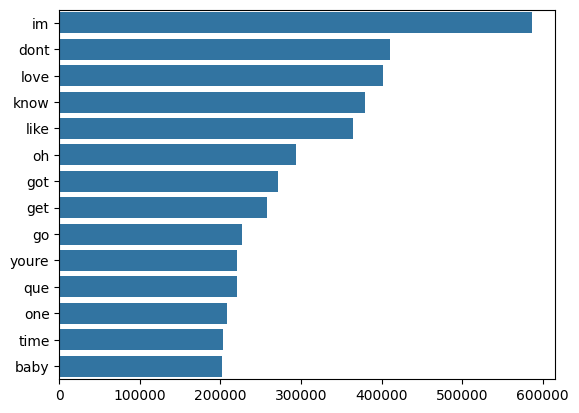

In [27]:
from collections import Counter
import seaborn as sns

corpus=[]
new= train['Lyrics_Processed'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)




In [28]:
#def get_top_ngram(corpus, n=None):
#    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#    bag_of_words = vec.transform(corpus)
##    sum_words = bag_of_words.sum(axis=0) 
 #   words_freq = [(word, sum_words[0, idx]) 
 #                 for word, idx in vec.vocabulary_.items()]
 #   words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 #   return words_freq[:10]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


In [30]:
#top_tri_grams=get_top_ngram(train['Lyrics_Processed'],n=3)
#x,y=map(list,zip(*top_tri_grams))
#sns.barplot(x=y,y=x)

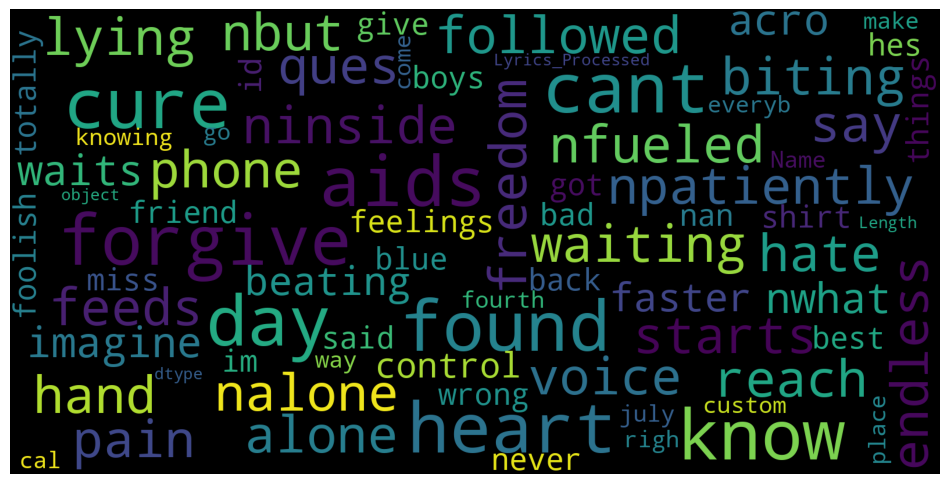

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=4,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
corpus = train['Lyrics_Processed']
show_wordcloud(corpus)

In [32]:
from textblob import TextBlob

<Axes: >

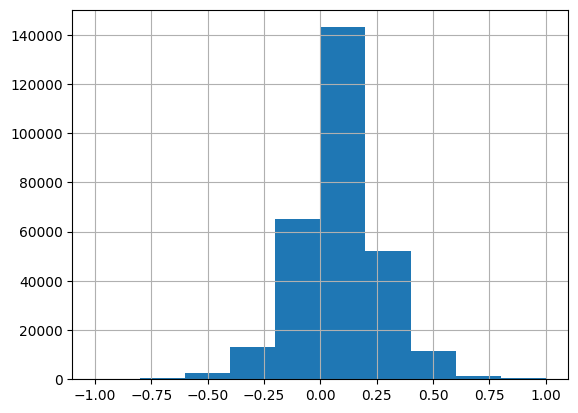

In [33]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

# polarity is a floating-point number that lies in the range of [-1,1] 
# where 1 means positive statement and -1 means a negative statement.

train['polarity_score']=train['Lyrics_Processed'].apply(lambda x : polarity(x))
train['polarity_score'].hist()

In [34]:
#from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
#le = LabelEncoder()

# Fit and transform the 'Artist' feature
#train['Artist'] = le.fit_transform(train['Artist'])

# Fit and transform the 'Song' feature
#train['Song'] = le.fit_transform(train['Song'])

# Fit and transform the 'Lyrics_Processed' feature
#train['Lyrics_Processed'] = le.fit_transform(train['Lyrics_Processed'])

# Fit and transform the 'Language' feature
#train['Language'] = le.fit_transform(train['Language'])


In [35]:
train.head()

,Artist,Song,Genre,Language,Lyrics,Lyrics_Processed,polarity_score
0,12 stones,world so cold,Rock,en,it starts with pain followed by hate\nfueled b...,starts pain followed hate\nfueled endless ques...,-0.045698
1,12 stones,broken,Rock,en,freedom\nalone again again alone\npatiently wa...,freedom\nalone alone\npatiently waiting phone\...,-0.277126
2,12 stones,3 leaf loser,Rock,en,biting the hand that feeds you lying to the vo...,biting hand feeds lying voice\ninside reach be...,-0.100000
3,12 stones,anthem for the underdog,Rock,en,you say you know just who i am\nbut you cant i...,say know am\nbut cant imagine\nwhat waits acro...,-0.145833
4,12 stones,adrenaline,Rock,en,my heart is beating faster cant control these ...,heart beating faster cant control feelings\nan...,0.009087


In [36]:
train.head()

,Artist,Song,Genre,Language,Lyrics,Lyrics_Processed,polarity_score
0,12 stones,world so cold,Rock,en,it starts with pain followed by hate\nfueled b...,starts pain followed hate\nfueled endless ques...,-0.045698
1,12 stones,broken,Rock,en,freedom\nalone again again alone\npatiently wa...,freedom\nalone alone\npatiently waiting phone\...,-0.277126
2,12 stones,3 leaf loser,Rock,en,biting the hand that feeds you lying to the vo...,biting hand feeds lying voice\ninside reach be...,-0.100000
3,12 stones,anthem for the underdog,Rock,en,you say you know just who i am\nbut you cant i...,say know am\nbut cant imagine\nwhat waits acro...,-0.145833
4,12 stones,adrenaline,Rock,en,my heart is beating faster cant control these ...,heart beating faster cant control feelings\nan...,0.009087


In [37]:
X = train[['Artist','Song','Language','Lyrics_Processed']]
y = train['Genre']

In [38]:
X['Artist'].head()

0    12 stones
1    12 stones
2    12 stones
3    12 stones
4    12 stones
Name: Artist, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [40]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(174085, 4)
(58029, 4)
(58029, 4)
(174085,)
(58029,)
(58029,)


In [41]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

2024-04-04 00:49:33.495408: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 00:49:33.749361: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 00:49:34.303692: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [42]:
learning_rate=0.0001
training_steps=1000
batch_size=128
display_step=200


#Network Parameters

num_input = 28
timesteps=28
num_hidden=128
num_classes=10


X1 = tf.keras.Input(shape=(timesteps, num_input), name='Input_X', dtype=tf.float32)
Y1 = tf.keras.Input(shape=(num_classes,), name='Input_Y', dtype=tf.float32)

weights = {
    'out': tf.Variable(tf.random.normal([num_hidden, num_classes]))
}

biases = {
    'out': tf.Variable(tf.random.normal([num_classes]))
}


2024-04-04 00:49:36.027907: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-04 00:49:36.028555: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [43]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [44]:
#learning_rate = 0.004
#training_epochs = 10
#n_input = 2


In [45]:
#MAX_NB_WORDS = 20000  
#EMBEDDING_DIM = 100   
#MAX_SEQUENCE_LENGTH = 250

In [46]:
X_train.shape

(174085, 4)

In [47]:
y_train.shape

(174085,)

In [48]:
#from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform target labels
#y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

# Now, you can use y_train_encoded and y_test_encoded in model.fit()
#model.fit(X_train, y_train_encoded, batch_size=16, epochs=5, validation_data=(X_test, y_test_encoded))


In [49]:
y_test

157441      Pop
145650     Rock
199098     Rock
168749    Metal
151015     Rock
          ...  
46440      Rock
121644      Pop
162807     Rock
113592      Pop
96251       Pop
Name: Genre, Length: 58029, dtype: object

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.tokenize import word_tokenize
tokenizer = Tokenizer()

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train['Lyrics_Processed'])
train_sequences = tokenizer.texts_to_sequences(X_train['Lyrics_Processed'])
test_sequences = tokenizer.texts_to_sequences(X_test['Lyrics_Processed'])

In [51]:
num_tokens = len(tokenizer.word_index)
print("Number of unique tokens:", num_tokens)

Number of unique tokens: 288844


In [52]:
X_train.shape

(174085, 4)

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences)
test_data = pad_sequences(test_sequences)

In [54]:
print(train_data.shape)
print(test_data.shape)

(174085, 2125)
(58029, 2125)


In [55]:
train_data
#test_data.shape

array([[    0,     0,     0, ...,    34,   357,   194],
       [    0,     0,     0, ...,    84,   681,     6],
       [    0,     0,     0, ..., 25603,   204, 56122],
       ...,
       [    0,     0,     0, ...,  1185,  1185,  1185],
       [    0,     0,     0, ...,  1159,    21,   566],
       [    0,     0,     0, ...,    51,     6,   179]], dtype=int32)

In [56]:
train_labels = y_train
test_labels = y_test

In [57]:
print(train_labels.shape)
print(test_labels.shape)

(174085,)
(58029,)


In [58]:
train_labels.shape

(174085,)

In [59]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming train_labels and test_labels are your categorical labels

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the labels and transform them to numerical labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert numerical labels to one-hot encoded vectors
labels_train = to_categorical(train_labels_encoded)
labels_test = to_categorical(test_labels_encoded)


In [60]:
print(test_labels_encoded.shape)
print(train_labels_encoded.shape)

(58029,)
(174085,)


In [61]:
labels_train = np.argmax(labels_train, axis=1)


In [62]:


print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (174085, 2125)
Shape of label tensor: (174085,)
Shape of label tensor: (58029, 10)


In [63]:
import numpy as np
X_train_reshaped = train_data.reshape(train_data.shape[0], 1, train_data.shape[1])

In [64]:

X_test_reshaped = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

In [65]:
MAX_NB_WORDS=288844
EMBEDDING_DIM=250

In [66]:
num_classes = len(np.unique(test_labels_encoded))
print(num_classes)

10


In [67]:
print(labels_train.shape)
print(train_data.shape)

(174085,)
(174085, 2125)


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences


print("Training Simple RNN")
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SimpleRNN(2))
model.add(Dense(10))
#random comment (delete while submitting)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))

Training Simple RNN


: 

In [ ]:
print(labels_train.shape)  # Should be (batch_size,)
print(model.output_shape) 

In [ ]:
X_train.shape

In [ ]:
X_test

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train['Lyrics_Processed'])

In [ ]:
word_index = tokenizer.word_index

In [ ]:
y_test.shape

In [ ]:
print("Found %s unique tokens." % len(word_index))

In [ ]:
#print(train_data.shape)
#print(test_data.shape)

In [ ]:
y_test.shape

In [ ]:
#le = LabelEncoder()
#le.fit(train_labels)
#train_labels = le.transform(train_labels)
#test_labels = le.transform(test_labels)
#print(le.classes_)
#print(np.unique(train_labels, return_counts=True))
#print(np.unique(test_labels, return_counts=True))

In [ ]:
EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

In [ ]:
y_test_encoded.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

print("Training Simple RNN")
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SimpleRNN(2))
model.add(Dense(2, activation="softmax"))


In [ ]:
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.sigmoid))

model.compile(loss="binary_crossentropy",
                   optimizer='adam',
                   metrics=['accuracy'])

hist = model.fit(train_data,y_test_encoded,
           batch_size=batch_size,
           epochs=100, verbose=0)

array to tensor

Check for tokenized, padded,encoded  and embedded values rather than numeric

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf

model = Sequential()

model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_encoded, epochs=3, validation_data=(X_test_reshaped, y_test_encoded))


In [ ]:
import os
os.getcwd()

In [ ]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


In [ ]:
tf.test.is_gpu_available()